In [1]:
import pandas as pd
import numpy as np
from numpy import sum
import matplotlib.pyplot as plt
import sys

#enable inline plotting - will pop up in separate window otherwise
%matplotlib inline

In [9]:
#create baby name data
years = range(1880, 2015)
#years = range(2000, 2015)

Location = r'datasets\babynames\names\\'

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = Location + 'yob%d.txt' % year
    #print(path)
    
    #create dataframe
    frame = pd.read_csv(path, names=columns)
    
    #add year column and append all dataframes
    frame['year'] = year
    pieces.append(frame)
    
#concatenate into single dataframe
names = pd.concat(pieces, ignore_index=True)

names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825433 entries, 0 to 1825432
Data columns (total 4 columns):
name      object
sex       object
births    int64
year      int64
dtypes: int64(2), object(2)
memory usage: 55.7+ MB


In [10]:
#make pivot table of sum of male/female births by birth year
total_births = names.pivot_table('births', index=['year'], columns='sex', aggfunc=sum)

In [11]:
total_births.tail()

sex,F,M
year,,
2010,1772738,1913851
2011,1753500,1893230
2012,1753922,1889414
2013,1745339,1881463
2014,1768775,1901376


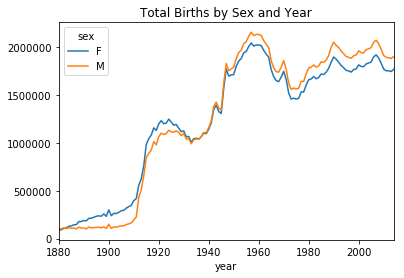

In [12]:
total_births.plot(title="Total Births by Sex and Year")

def add_prop(group):
    births = group.births.astype(float)
    
    group['prop'] = births/births.sum()
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)

In [13]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825433 entries, 0 to 1825432
Data columns (total 5 columns):
name      object
sex       object
births    int64
year      int64
prop      float64
dtypes: float64(1), int64(2), object(2)
memory usage: 69.6+ MB


In [14]:
#sanity check
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

In [16]:
#top 100 names for each year/sex combo

def get_top100(group):
    return group.sort_values(by='births', ascending=False)[:100]

grouped = names.groupby(['year', 'sex'])
top100 = grouped.apply(get_top100)

top100

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
         5         Margaret   F    1578  1880  0.017342
         6              Ida   F    1472  1880  0.016177
         7            Alice   F    1414  1880  0.015540
         8           Bertha   F    1320  1880  0.014507
         9            Sarah   F    1288  1880  0.014155
         10           Annie   F    1258  1880  0.013825
         11           Clara   F    1226  1880  0.013474
         12            Ella   F    1156  1880  0.012704
         13        Florence   F    1063  1880  0.011682
         14            Cora   F    1045  1880  0.011484
         15          Martha   F    1040  1880  0.011429
         16           Laura   F    1012  1880  0.011122
         17          Nellie   F     995  1880  0.010935
         18           Grace   F     982  1880  0.010792
         19          Carrie   F     949  1880  0.010429
         20           Maude   F     858  1880  0.009429
         21           Mabel   F     808  1880  0.008880
         22          Bessie   F     796  1880  0.008748
         23          Jennie   F     793  1880  0.008715
         24        Gertrude   F     787  1880  0.008649
         25           Julia   F     783  1880  0.008605
         26          Hattie   F     769  1880  0.008451
         27           Edith   F     768  1880  0.008440
         28          Mattie   F     704  1880  0.007737
         29            Rose   F     700  1880  0.007693
...                     ...  ..     ...   ...       ...
2014 M   1811526    Brandon   M    5804  2014  0.003053
         1811527      Tyler   M    5785  2014  0.003043
         1811528     Parker   M    5677  2014  0.002986
         1811529      Ayden   M    5586  2014  0.002938
         1811530      Jason   M    5510  2014  0.002898
         1811531       Jose   M    5442  2014  0.002862
         1811532        Ian   M    5422  2014  0.002852
         1811533      Chase   M    5322  2014  0.002799
         1811534       Adam   M    5293  2014  0.002784
         1811535     Hudson   M    5199  2014  0.002734
         1811536      Nolan   M    5181  2014  0.002725
         1811537    Zachary   M    5137  2014  0.002702
         1811538     Easton   M    4961  2014  0.002609
         1811539      Blake   M    4913  2014  0.002584
         1811540     Jaxson   M    4900  2014  0.002577
         1811541     Cooper   M    4803  2014  0.002526
         1811542    Lincoln   M    4785  2014  0.002517
         1811543     Xavier   M    4726  2014  0.002486
         1811544    Bentley   M    4722  2014  0.002483
         1811545     Kayden   M    4691  2014  0.002467
         1811546     Carson   M    4580  2014  0.002409
         1811547      Brody   M    4297  2014  0.002260
         1811548      Asher   M    4279  2014  0.002250
         1811549  Nathaniel   M    4257  2014  0.002239
         1811550      Ryder   M    4073  2014  0.002142
         1811551     Justin   M    3991  2014  0.002099
         1811552        Leo   M    3936  2014  0.002070
         1811553       Juan   M    3887  2014  0.002044
         1811554       Luis   M    3879  2014  0.002040
         1811555     Camden   M    3872  2014  0.002036

[27000 rows x 5 columns]

In [17]:
#analyze name trends

boys = top100[top100.sex == 'M']
girls = top100[top100.sex == 'F']

total_births = top100.pivot_table('births', index='year', columns='name', aggfunc=sum)

total_births

C:\ProgramData\Anaconda2\lib\site-packages\pandas\core\reshape\pivot.py:135: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


name,Aaliyah,Aaron,Abigail,Ada,Adam,Addie,Addison,Adrian,Agnes,Aidan,...,Willis,Wilma,Woodrow,Wyatt,Xavier,Yolanda,Yvonne,Zachary,Zoe,Zoey
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,652.0,NaN,274.0,NaN,NaN,473.0,NaN,...,166.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1881,NaN,NaN,NaN,628.0,NaN,287.0,NaN,NaN,424.0,NaN,...,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1882,NaN,NaN,NaN,689.0,NaN,341.0,NaN,NaN,565.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1883,NaN,NaN,NaN,778.0,NaN,362.0,NaN,NaN,623.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1884,NaN,NaN,NaN,854.0,NaN,356.0,NaN,NaN,703.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1885,NaN,NaN,NaN,876.0,NaN,406.0,NaN,NaN,695.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1886,NaN,NaN,NaN,915.0,NaN,417.0,NaN,NaN,779.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1887,NaN,NaN,NaN,910.0,NaN,393.0,NaN,NaN,896.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1888,NaN,NaN,NaN,1116.0,NaN,455.0,NaN,NaN,1046.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000EDF1940>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000C8E1BA8>], dtype=object)

C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\transforms.py:661: RuntimeWarning: invalid value encountered in absolute
  inside = ((abs(dx0 + dx1) + abs(dy0 + dy1)) == 0)


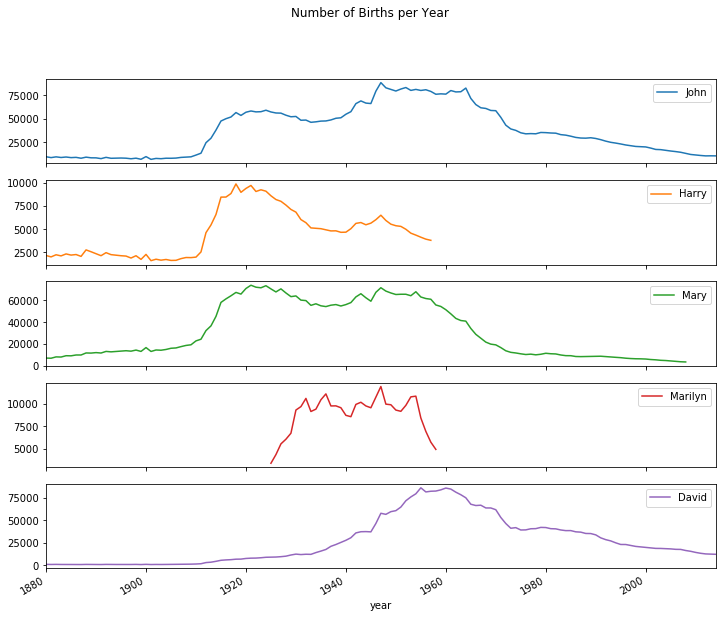

In [18]:
#plot names

subset = total_births[['John', 'Harry', 'Mary', 'Marilyn', 'David']]
subset.plot(subplots=True, figsize=(12, 10), grid=False, title="Number of Births per Year")